<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [78]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [79]:
sat_path = '../../datasets/state_sat_scores/sat_scores.csv'

with open(sat_path,'r') as f:
    data = [row.strip().split(',') for row in f]

this_dic = {row[0]:row[1:] for row in zip(*data)}
this_dic

{'Math': ('510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'),
 'Rate': ('82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'),
 'State': ('CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [80]:
df_sat = pd.DataFrame(this_dic)
df = pd.read_csv(sat_path)
print(df_sat.head())
print(df.head())

print(df_sat['Verbal'].dtype)
print(df['Verbal'].dtype)

  Math Rate State Verbal
0  510   82    CT    509
1  513   81    NJ    499
2  515   79    MA    511
3  505   77    NY    495
4  516   72    NH    520
  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
object
int64


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [81]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [82]:
data_dic = {
    ('Math','int'):'Average math score on SAT on a scale of 1-800 in the given state',
    ('Verbal','int'):'Average verbal score on SAT on a scale of 1-800 in the given state',
    ('Rate','int'): 'Does not specify what is being rated',
    ('State','object'):'All 50 states in the U.S. are included in this dataset',
    'Dimensions':('52 rows by 4 columns')
}

data_dic

{('Rate', 'int'): 'Does not specify what is being rated',
 'Dimensions': '52 rows by 4 columns',
 ('State', 'object'): 'All 50 states in the U.S. are included in this dataset',
 ('Verbal',
  'int'): 'Average verbal score on SAT on a scale of 1-800 in the given state',
 ('Math',
  'int'): 'Average math score on SAT on a scale of 1-800 in the given state'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

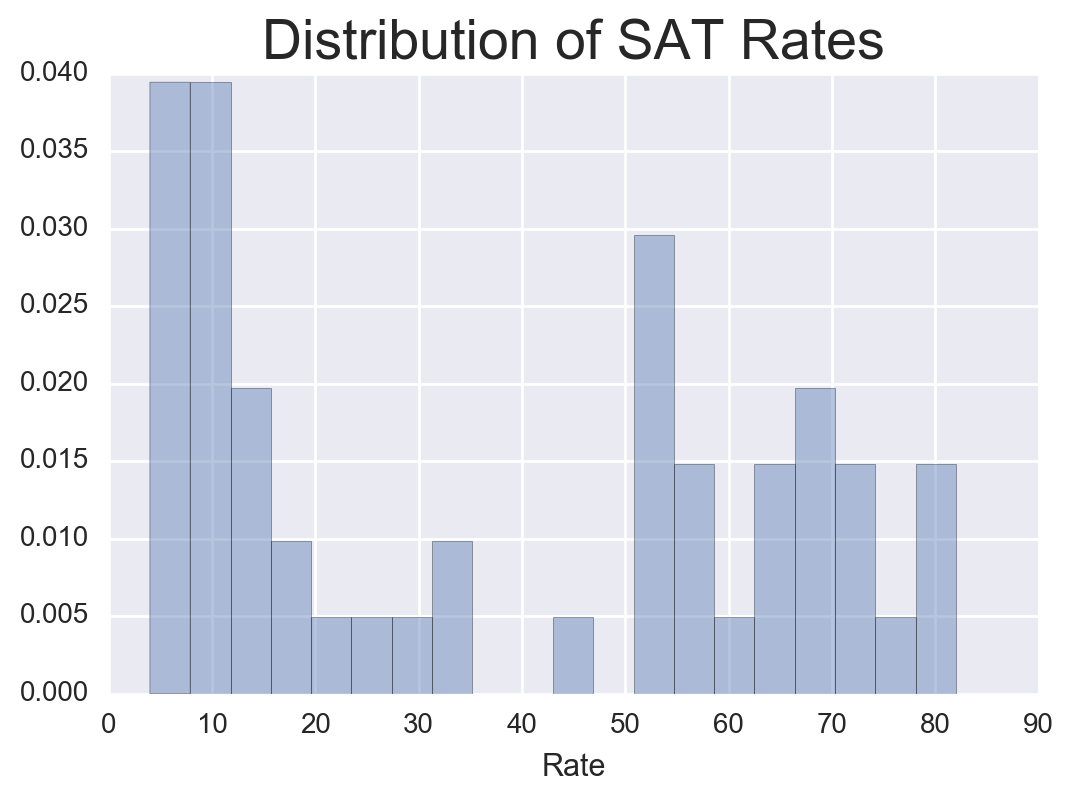

In [83]:
fig = plt.figure(figsize = (6,4))
ax1 = fig.gca()
ax1 = sns.distplot(df['Rate'],kde=False,norm_hist=True,bins=20)
ax1.set_title('Distribution of SAT Rates', fontsize=20)

plt.show()

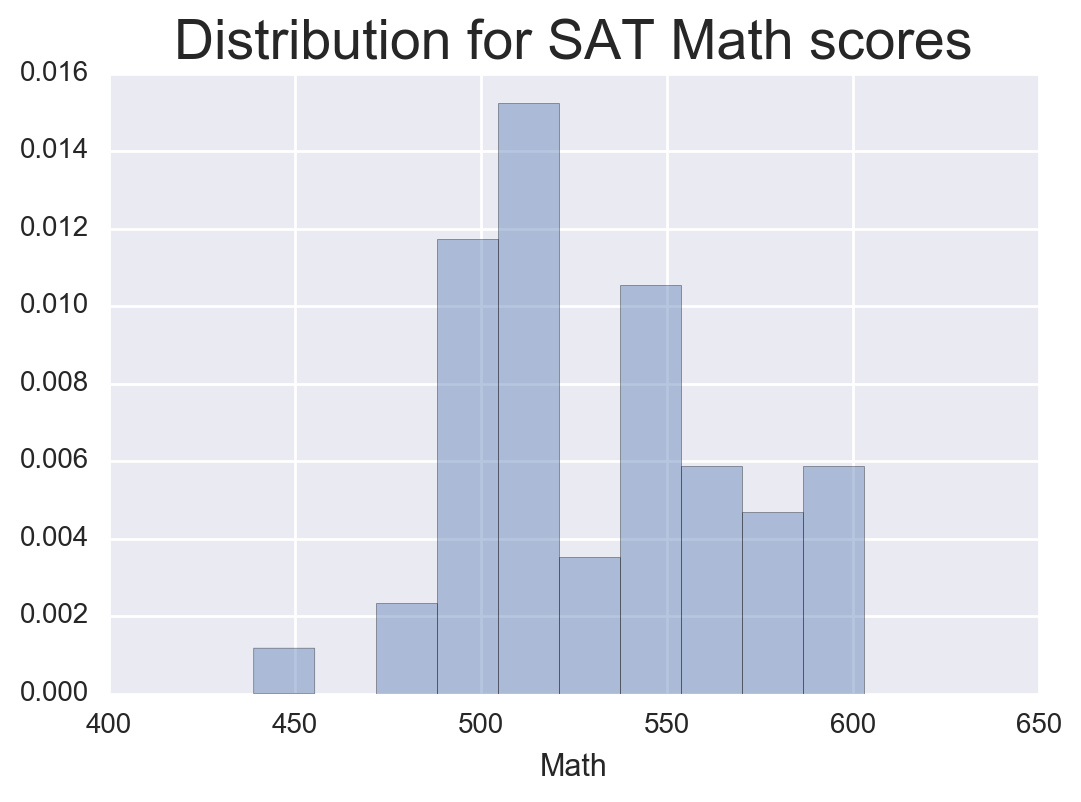

In [84]:
fig = plt.figure(figsize = (6,4))
ax2 = fig.gca()
ax2 = sns.distplot(df['Math'],kde=False,norm_hist=True,bins=10)
ax2.set_title('Distribution for SAT Math scores', fontsize=20)

plt.show()

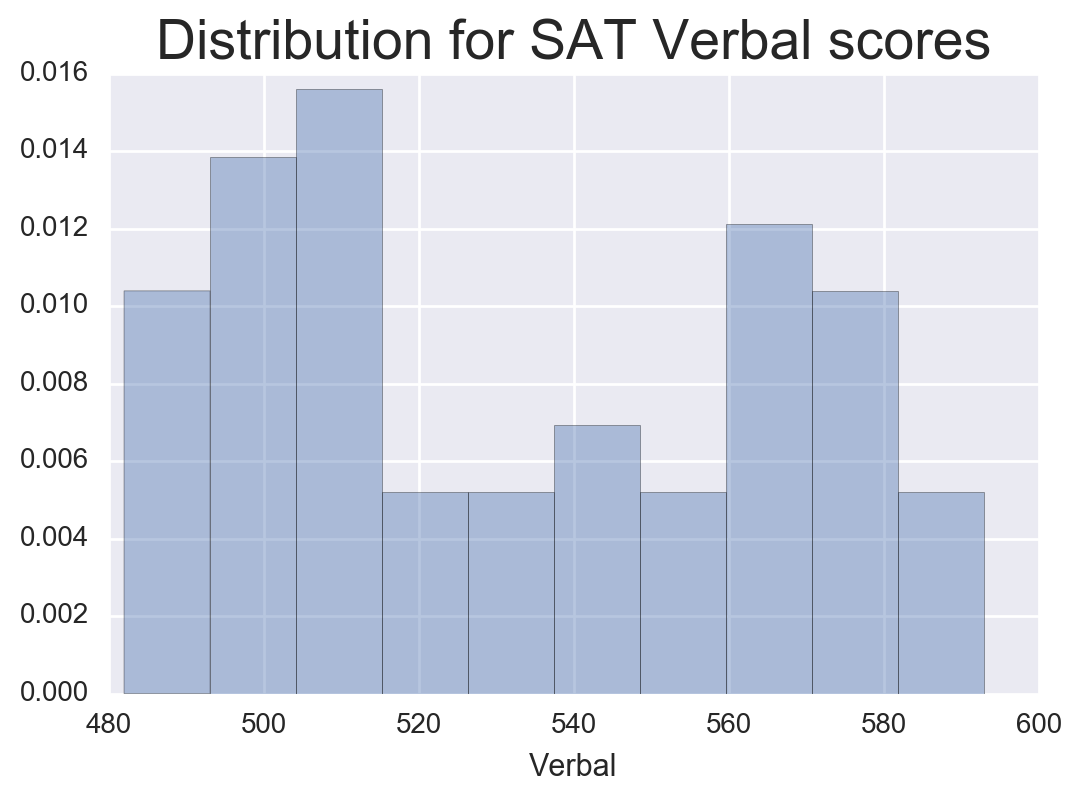

In [85]:
fig = plt.figure(figsize = (6,4))
ax3 = fig.gca()
ax3 = sns.distplot(df['Verbal'],kde=False,norm_hist=True,bins=10)
ax3.set_title('Distribution for SAT Verbal scores', fontsize=20)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

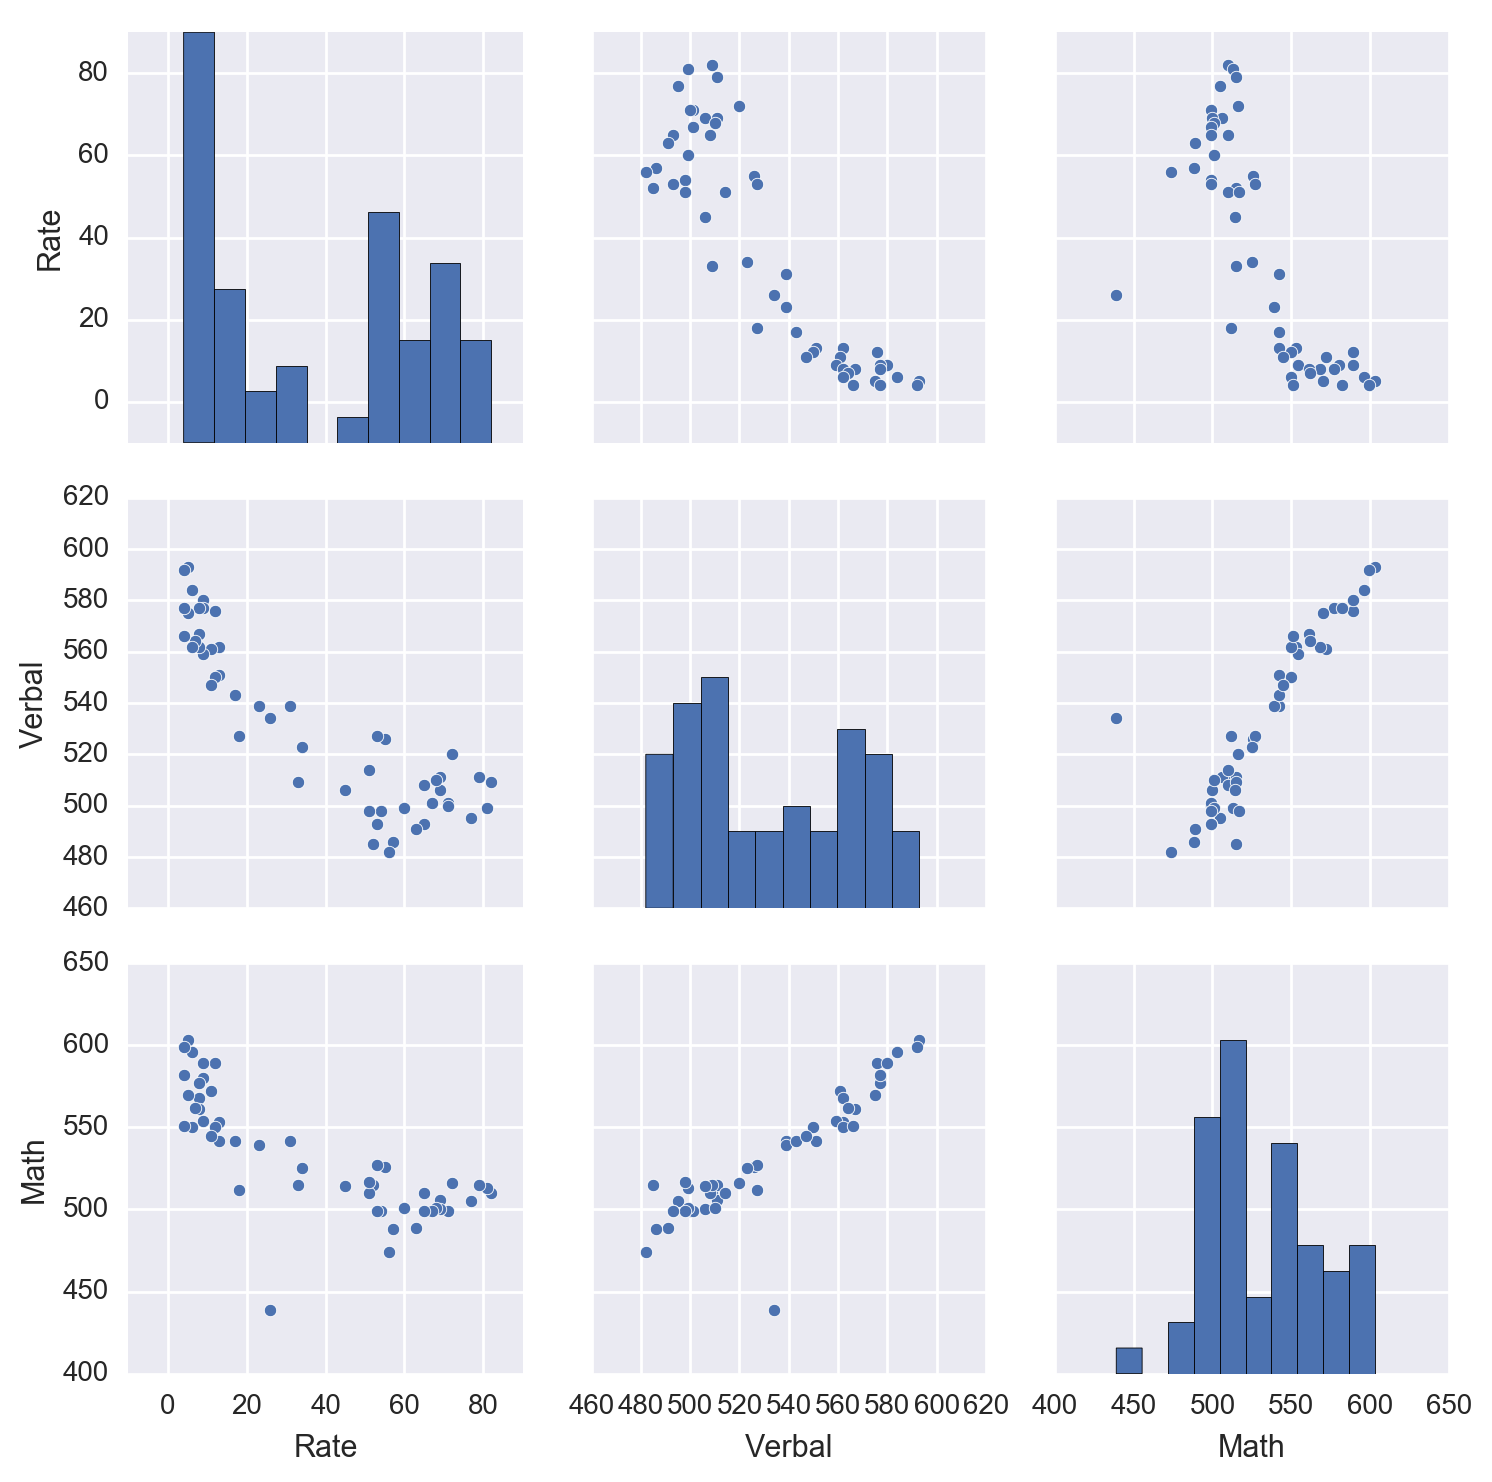

In [86]:
sns.pairplot(df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

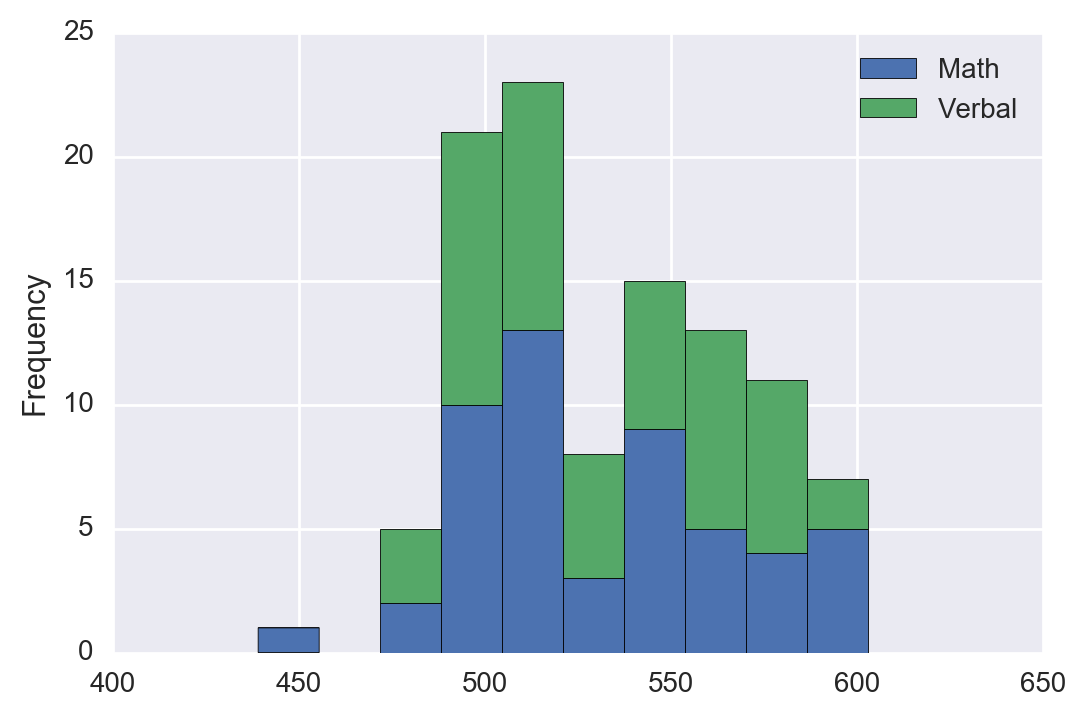

In [87]:
df[['Math', 'Verbal']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

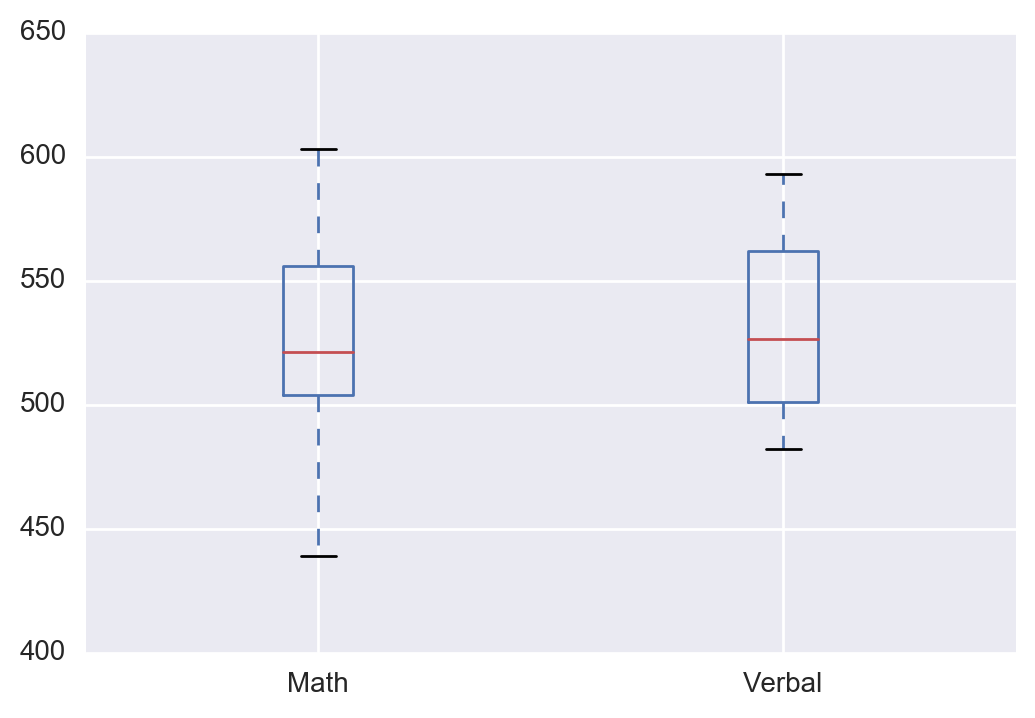

In [88]:
df[['Math', 'Verbal']].plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [89]:
verb_mask = (df['Verbal'] > df['Verbal'].mean())
df[verb_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 26 to 50
Data columns (total 4 columns):
State     24 non-null object
Rate      24 non-null int64
Verbal    24 non-null int64
Math      24 non-null int64
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


There are 24 states above the mean for the verbal section of the SAT. Since the mean is higher than the median, the data is slightly skewed to the right. (mean = 26 and median = 24) 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [90]:
verb_mask = (df['Verbal'] > df['Verbal'].median())
df[verb_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 19 to 50
Data columns (total 4 columns):
State     26 non-null object
Rate      26 non-null int64
Verbal    26 non-null int64
Math      26 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [91]:
df['Differential'] = df['Verbal'] - df['Math']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State           52 non-null object
Rate            52 non-null int64
Verbal          52 non-null int64
Math            52 non-null int64
Differential    52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [92]:
verb_over_math = df.sort_values("Differential").iloc[0:10,:]
math_over_verb = df.sort_values("Differential").iloc[-10:,:]

print (verb_over_math.head(10))
print('\n')
print (math_over_verb.sort_values('Differential', ascending=False).head(10))

   State  Rate  Verbal  Math  Differential
21    HI    52     485   515           -30
23    CA    51     498   517           -19
1     NJ    81     499   513           -14
33    IL    12     576   589           -13
44    WI     6     584   596           -12
36    MI    11     561   572           -11
3     NY    77     495   505           -10
47    IA     5     593   603           -10
37    MN     9     580   589            -9
51   All    45     506   514            -8


   State  Rate  Verbal  Math  Differential
27    OH    26     534   439            95
29    WV    18     527   512            15
50    MS     4     566   551            15
45    AR     6     562   550            12
9     VA    68     510   501             9
31    TN    13     562   553             9
32    NM    13     551   542             9
16    DC    56     482   474             8
41    OK     8     567   561             6
8     ME    69     506   500             6


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State           52 non-null object
Rate            52 non-null int64
Verbal          52 non-null int64
Math            52 non-null int64
Differential    52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [94]:
df = df.drop(['Differntial', 'State'], axis=1)
df.corr()

ValueError: labels ['Differntial'] not contained in axis

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [95]:
df.describe()

,Rate,Verbal,Math,Differential
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [96]:
df.cov()

,Rate,Verbal,Math,Differential
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Differential,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [97]:
iowa_file = '../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa_liq_sales = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [98]:
iowa_liq_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [99]:
iowa_liq_sales.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [100]:
iowa_liq_sales['State Bottle Cost'] = iowa_liq_sales['State Bottle Cost'].str.replace('$', '')
iowa_liq_sales['State Bottle Retail']= iowa_liq_sales['State Bottle Retail'].str.replace('$', '')
iowa_liq_sales['Sale (Dollars)']= iowa_liq_sales['Sale (Dollars)'].str.replace('$', '')
iowa_liq_sales['City'] = iowa_liq_sales['City'].str.lower()
iowa_liq_sales['County'] = iowa_liq_sales['County'].str.lower()
iowa_liq_sales['Category Name'] = iowa_liq_sales['Category Name'].str.lower()
iowa_liq_sales['Item Description'] = iowa_liq_sales['Item Description'].str.lower()
iowa_liq_sales['Sale (Dollars)'] = iowa_liq_sales['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa_liq_sales['State Bottle Cost'] = iowa_liq_sales['State Bottle Cost'].convert_objects(convert_numeric=True)
iowa_liq_sales['State Bottle Retail'] = iowa_liq_sales['State Bottle Retail'].convert_objects(convert_numeric=True)
iowa_liq_sales['Sale (Dollars)'] = iowa_liq_sales['Sale (Dollars)'].convert_objects(convert_numeric=True)

/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [101]:
iowa_liq_sales['Date'] =pd.to_datetime(iowa_liq_sales.Date)
iowa_liq_sales.sort_values(by='Date')

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
93978,2015-01-05,4303,mediapolis,52637,29.0,des moines,1031080.0,vodka 80 proof,260,37993,smirnoff vodka 80 prf,200,2.75,4.13,4,16.52,0.80,0.21
58330,2015-01-05,2650,harlan,51537,83.0,shelby,1032080.0,imported vodka,420,34162,belvedere vodka,1000,20.63,30.95,3,92.85,3.00,0.79
1357,2015-01-05,2613,council bluffs,51501,78.0,pottawattamie,1031090.0,other proof vodka,260,40926,smirnoff silver vodka 90 prf,750,7.86,11.79,2,23.58,1.50,0.40
58366,2015-01-05,4806,west liberty,52776,70.0,muscatine,1032200.0,imported vodka - misc,260,64750,ciroc coconut,750,19.00,28.50,12,342.00,9.00,2.38
266308,2015-01-05,2650,harlan,51537,83.0,shelby,1031080.0,vodka 80 proof,301,38176,titos vodka,750,9.65,14.48,4,57.92,3.00,0.79
126058,2015-01-05,3618,cedar rapids,52404,57.0,linn,1012100.0,canadian whiskies,115,11788,black velvet,1750,10.45,15.68,72,1128.96,126.00,33.29
126048,2015-01-05,2666,ankeny,50023,77.0,polk,1062050.0,barbados rum,305,42204,blue chair bay banana,750,9.42,14.13,2,28.26,1.50,0.40
32466,2015-01-05,2647,cedar rapids,52411,57.0,linn,1012210.0,single malt scotch,370,5037,glenlivet 12 yr malt scotch,1000,27.49,41.24,2,82.48,2.00,0.53
58525,2015-01-05,4312,council bluffs,51501,78.0,pottawattamie,1071100.0,american cocktails,395,58838,jose cuervo authentic lime margarita,1750,8.20,12.30,6,73.80,10.50,2.77
58535,2015-01-05,4621,maxwell,50161,85.0,story,1031080.0,vodka 80 proof,297,35918,five o'clock vodka,1750,7.20,10.80,6,64.80,10.50,2.77


In [102]:
iowa_nona = iowa_liq_sales.dropna()

In [103]:
iowa_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null datetime64[ns]
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: datetim

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
#I ran out of time to solve this problem but I initially tried to solve
# this problem as such:
#Make date masks and run these through the DataFrame to check if a store was open for the
#entirety of 2015 and 2016. If a store had a transaction for each month, it can be assumed
#that the store is open. However, I was not able to solve this using this method

#Another approach to this problem is to split up the month and year into different columns.
#Then you can group by stores and iterate through these stores to check if there had been 
#any transactions at a given store during any month


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [122]:
iowa_mask = (iowa_nona['Date'] > '12/31/2014') & (iowa_nona['Date'] <= '12/31/2015')
iowa_2015 = iowa_nona[iowa_mask]
iowa_2015.groupby(['Store Number'])[['Sale (Dollars)']].sum().reset_index().sort_values(by='Sale (Dollars)',ascending=False)

,Store Number,Sale (Dollars)
125,2633,997924.42
1032,4829,874664.18
194,3385,439584.35
36,2512,419534.61
200,3420,348837.36
389,3952,331874.38
323,3814,247417.42
193,3354,240153.72
306,3773,232066.78
153,2670,227060.96


### 10.2 Calculate the profit each store is making in 2015.


In [123]:
iowa_2015.loc[:,'Cost (Dollars)'] = iowa_2015['Bottles Sold'] * iowa_2015['State Bottle Cost']
iowa_2015.loc[:,'Profit (Dollars)'] = iowa_2015['Sale (Dollars)'] - iowa_2015['Cost (Dollars)']

iowa_2015.groupby(['Store Number'])[['Profit (Dollars)']].sum().reset_index().sort_values(by='Profit (Dollars)',ascending=False).head()

/Users/aneelanand/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/aneelanand/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Store Number,Profit (Dollars)
125,2633,332863.87
1032,4829,291813.75
194,3385,147084.62
36,2512,140072.72
200,3420,116532.24


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [124]:
dist_by_county_iowa = iowa_2015.groupby(['County'])[['Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()
dist_by_county_iowa['Profit Per Gallon'] = dist_by_county_iowa['Profit (Dollars)'] / dist_by_county_iowa['Volume Sold (Gallons)']
dist_by_county_iowa.sort_values(by='Profit Per Gallon',ascending=False).head()

,County,Profit (Dollars),Volume Sold (Gallons),Profit Per Gallon
24,dallas,167728.26,7927.89,21.156734
51,johnson,574002.02,27958.19,20.530729
76,polk,2134012.43,109269.47,19.529814
81,scott,681600.54,35216.02,19.354843
50,jefferson,27896.95,1446.20,19.289829


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [125]:
iowa_nona['Category Name'].unique()

def create_sub_cat(liq_cat):
    if 'vodka' in liq_cat.lower():
        return 'Vodka'
    elif 'whiskies' in liq_cat.lower():
        return 'Whisky'
    elif 'rum' in liq_cat.lower():
        return 'Rum'
    elif 'brandies' in liq_cat.lower():
        return 'Brandy'
    elif 'gin' in liq_cat.lower():
        return 'Gin'
    elif 'tequila' in liq_cat.lower():
        return 'Tequila'
    elif 'liquer' in liq_cat.lower():
        return 'Liquer'
    else:
        return 'Other'
    
iowa_nona['Broad Category'] = iowa_nona['Category Name'].map(create_sub_cat)
iowa_nona.head()
    

/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Broad Category
0,2015-11-04,3717,sumner,50674,9.0,bremer,1051100.0,apricot brandies,55,54436,mr. boston apricot brandy,750,4.50,6.75,12,81.00,9.0,2.38,Brandy
1,2016-03-02,2614,davenport,52807,82.0,scott,1011100.0,blended whiskies,395,27605,tin cup,750,13.75,20.63,2,41.26,1.5,0.40,Whisky
2,2016-02-11,2106,cedar falls,50613,7.0,black hawk,1011200.0,straight bourbon whiskies,65,19067,jim beam,1000,12.59,18.89,24,453.36,24.0,6.34,Whisky
3,2016-02-03,2501,ames,50010,85.0,story,1071100.0,american cocktails,395,59154,1800 ultimate margarita,1750,9.50,14.25,6,85.50,10.5,2.77,Other
4,2015-08-18,3654,belmond,50421,99.0,wright,1031080.0,vodka 80 proof,297,35918,five o'clock vodka,1750,7.20,10.80,12,129.60,21.0,5.55,Vodka


### 10.5 Do relationships exist between the broader liquor type and profit?

In [ ]:
y = iowa_nona.groupby('Broad Category')[['Profit Per Gallon']].mean().reset_index()
y.sort_values('Profit Per Gallon', ascending=False)
y.sort_values('Profit Per Gallon', ascending=False).plot(kind='line', x='Broad Category Name', y='Profit per Gallon in 2015',
                                                          title='Broader Liquor Type and Profit')

In [ ]:
#The results show that per gallon basis, Tequila, Brandy, Liqeur and Whisky
#have the highest profits in that specific order

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [127]:
iowa_nona.columns.unique()

array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'Broad Category'], dtype=object)

In [129]:
design_a_tax = iowa_nona.groupby(['Broad Category'])[['Sale (Dollars)']].sum().sort_values('Sale (Dollars)', ascending=False)

In [130]:
design_a_tax

,Sale (Dollars)
Broad Category,
Whisky,1.051189e+07
Vodka,8.340401e+06
Other,7.032206e+06
Rum,4.557762e+06
Tequila,1.880731e+06
Brandy,1.450612e+06
Gin,9.145138e+05


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
